In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
proj="SN5"

In [4]:
address = "C:\DADOS\ANDERSON\PROJ_VULCAN\SN5_1221\\"

In [5]:
chart_size= [10,10]

In [6]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF']
str_ore       = ['JP', 'HC']
ff_rocks      = ['CE', 'HF','HC', 'FMN', 'HMN', 'JP']

ore_rocks     = ['CE', 'HC', 'HF', 'HMN']
basin_rocks   = ['JP']

model_rocks   = ['CQ', 'CE', 'HC', 'HF', 'HMN', 'FMN', 'JP', 'MS', 'MSD', 'MD', 'CGL']

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']
faixas        = ['G1A', 'G1B', 'G2', 'G3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']


set_g1a = ['G1A','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
set_g1b = ['G1B','FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']


#UNIQUE CLI: array(['CE', 'HC', 'MD', 'HF', 'CQ', 'SR', 'MSD', 'AT', 'MS', 'HMN', 'DT', 'FMN', 'JP', 'CGL'], dtype=object)
litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00", CQ= "#77FFBB", \
               FMN= "#7766DD", HC= "#EE0000",HF= "#EE00DD", HMN= "#995555", JP= "#004488", \
               MD= "#CC8800", MS= "#99BB99", MSD= "#DDCC77", SR= "#FFFFFF", DT= "#FFFFFF", CGL= "#DDF542")

valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')


## Managing Dependencies Before Get Started:

In [7]:
# check if packages are installed: open conda prompt and run:

# conda search scipy
# conda search matplotlib
# conda search seaborn
# verify package version: sea.__version__ (example using seaborn)

# installing packages:

# when you code using main env:
# conda install scipy
# or (specific version):
# conda install scipy=0.15.0

# when you code in many environments (rare):
# conda install --name myenv scipy

#pip install python-ternary

## Load data

In [66]:
fso = pd.read_csv(address+'sn5sn5_bbb_entry_prim_mined.csv', low_memory=False, na_values='-99', encoding="latin1")
fso.rename(columns=str.upper, inplace=True)

In [67]:
fso.head(5)

,COMPID,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,GEOCD2,DENS_GG_FINAL,AUX1,PRIMITIVA,TRIDIST,ABS,TRIDIST_OUT21,MINED
0,750CMFLP,N5E-FD01412,595936.772,9328624.521,680.511,1.99,0.00,1.99,CQ,None,NaN,NaN,0,-0.685094,0.685094,-0.906141,0
1,750CMFLP,N5E-FD01412,595937.987,9328624.463,676.178,7.01,1.99,9.00,CQ,Ok,2.202,2.202,0,-5.102474,5.102474,-5.346547,0
2,750CMFLP,N5E-FD01412,595939.929,9328624.378,669.188,7.50,9.00,16.50,CE,Ok,2.444,2.444,0,-12.227230,12.227230,-12.464343,0
3,750CMFLP,N5E-FD01412,595941.014,9328624.333,665.209,0.75,16.50,17.25,CE,Ok,2.989,2.989,0,-16.281482,16.281482,-16.497797,0
4,750CMFLP,N5E-FD01412,595942.092,9328624.289,661.228,7.50,17.25,24.75,MD,Ok,2.149,2.149,0,-20.337237,20.337237,-20.532872,0


## BUILDING N' CUSTOMIZING BASIC STATS TABLE

## STEPS

#### 1 - write functions for each parameter

##### - function needs to receive table (dataframe), groupby column and variable to solve

##### 2 - create table to summarize (e.g. :  table_average = get_wav(dataframename, 'length', 'fegl'))

##### 3 - do the last step for all desired parameters

##### 4 - join all tables using lito as index

## FUNCTIONS

In [10]:
def get_count(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_c=pd.DataFrame(process_df2.count())
    
    stats_c.set_axis(['count'], axis=1, inplace=True)
    return stats_c

In [11]:
def get_mean(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_m=pd.DataFrame(process_df2.mean())
    
    stats_m.set_axis(['mean'], axis=1, inplace=True)
    return stats_m

In [12]:
def get_wavg(df, groupby, w , z):
    process_df1 = df.loc[:, [groupby,w,z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats=pd.DataFrame(process_df2.apply(lambda x: np.average(x[z], weights=x[w])))
    
    stats.set_axis(['wavg'], axis=1, inplace=True)
    return stats

In [13]:
def get_min(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_mi=pd.DataFrame(process_df2.apply(lambda x: np.nanmin(x[z])))
    
    stats_mi.set_axis(['minimum'], axis=1, inplace=True)
    return stats_mi

In [14]:
def get_quant(df,groupby, z, quant):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_q=pd.DataFrame(process_df2.apply(lambda x: np.nanquantile(x[z], quant)))
    
    stats_q.set_axis(['Q'+ '%.0d' % (quant*100)], axis=1, inplace=True)
    return stats_q
    

In [15]:
def get_max(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_ma=pd.DataFrame(process_df2.apply(lambda x: np.nanmax(x[z])))
    
    stats_ma.set_axis(['maximum'], axis=1, inplace=True)
    return stats_ma

In [16]:
def get_var(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_v=pd.DataFrame(process_df2.apply(lambda x: np.nanvar(x[z])))
    
    stats_v.set_axis(['variance'], axis=1, inplace=True)
    return stats_v

In [17]:
def get_std(df, groupby,  z):
    process_df1 = df.loc[:, [groupby, z]]   
    
    process_df1.dropna(how='any', inplace=True)
    
    process_df2=process_df1.groupby(groupby)
    
    stats_s=pd.DataFrame(process_df2.apply(lambda x: np.nanstd(x[z])))
    
    stats_s.set_axis(['std dev'], axis=1, inplace=True)
    return stats_s

## getting weigthed average

In [18]:
mg=get_wavg(fso,'GEOCOD', 'LENGTH', 'DENS_GG_FINAL')
mg

,wavg
GEOCOD,
AT,2.454423
CE,2.988564
CQ,2.559784
FMN,2.968855
HC,3.699553
HF,3.453689
HMN,3.452992
JP,3.246596
MD,2.250784


## getting value count

In [19]:
ct=get_count(fso,'GEOCOD', 'DENS_GG_FINAL')
ct

,count
GEOCOD,
AT,34
CE,20
CQ,47
FMN,12
HC,96
HF,392
HMN,33
JP,176
MD,477


## simple mean

In [20]:
mn=get_mean(fso,'GEOCOD', 'DENS_GG_FINAL')
mn

,mean
GEOCOD,
AT,2.435882
CE,3.002650
CQ,2.483298
FMN,2.947083
HC,3.582510
HF,3.212151
HMN,3.215242
JP,3.188523
MD,2.270029


## testing some behavior issues

In [21]:
s=[0,0,1,2,3,np.nan]
s

[0, 0, 1, 2, 3, nan]

In [22]:
#note that numpy returns nan when we have absent data along values, 
#alternativelly, we use nanmin to skip no data values
np.amin(s)

nan

In [23]:
#or pass using condition:
np.amin(s, where=~np.isnan(s),initial=1000)

0.0

In [24]:
np.count_nonzero(s)

4

In [25]:
mi=get_min(fso,'GEOCOD','DENS_GG_FINAL')

In [26]:
mi

,minimum
GEOCOD,
AT,1.303
CE,2.444
CQ,1.190
FMN,2.583
HC,3.301
HF,2.556
HMN,2.625
JP,2.526
MD,1.012


## getting main quantiles

In [27]:
q25=get_quant(fso, 'GEOCOD', 'DENS_GG_FINAL', 0.25)

In [28]:
q25

,Q25
GEOCOD,
AT,2.16200
CE,2.82750
CQ,2.19250
FMN,2.79525
HC,3.47275
HF,2.85375
HMN,2.87400
JP,3.00175
MD,2.12200


In [29]:
q50 = get_quant(fso, 'GEOCOD', 'DENS_GG_FINAL', 0.50)

In [30]:
q50

,Q50
GEOCOD,
AT,2.4305
CE,2.9945
CQ,2.4890
FMN,2.9415
HC,3.5755
HF,3.1850
HMN,3.2700
JP,3.2045
MD,2.2400


In [31]:
q75 = get_quant(fso, 'GEOCOD', 'DENS_GG_FINAL', 0.75)

In [32]:
q75

,Q75
GEOCOD,
AT,2.65675
CE,3.15175
CQ,2.82000
FMN,3.16075
HC,3.67800
HF,3.52325
HMN,3.46000
JP,3.42375
MD,2.40000


In [33]:
ma=get_max(fso,'GEOCOD','DENS_GG_FINAL')

In [34]:
ma

,maximum
GEOCOD,
AT,3.675
CE,3.855
CQ,3.319
FMN,3.386
HC,4.069
HF,4.004
HMN,3.945
JP,3.832
MD,3.373


In [35]:
va=get_var(fso,'GEOCOD','DENS_GG_FINAL')

In [36]:
va

,variance
GEOCOD,
AT,0.201176
CE,0.114016
CQ,0.219124
FMN,0.058979
HC,0.024768
HF,0.143372
HMN,0.128632
JP,0.074239
MD,0.078436


In [37]:
std=get_std(fso,'GEOCOD','DENS_GG_FINAL')

In [38]:
std

,std dev
GEOCOD,
AT,0.448527
CE,0.337663
CQ,0.468107
FMN,0.242856
HC,0.157378
HF,0.378645
HMN,0.358653
JP,0.272468
MD,0.280065


## joining all tables usin lito

In [39]:
summary=pd.concat([ct, mn, mg, mi, q25, q50, q75, ma, va, std], axis=1)
summary['INLIERS_FLOOR']=summary['Q25']-((summary['Q75']-summary['Q25'])*1.5)
summary['INLIERS_CEIL']=summary['Q75']+((summary['Q75']-summary['Q25'])*1.5)

#summary=pd.concat([ct, mn], ignore_index=False, axis=1)

In [40]:
summary

,count,mean,wavg,minimum,Q25,Q50,Q75,maximum,variance,std dev,INLIERS_FLOOR,INLIERS_CEIL
GEOCOD,,,,,,,,,,,,
AT,34,2.435882,2.454423,1.303,2.16200,2.4305,2.65675,3.675,0.201176,0.448527,1.419875,3.398875
CE,20,3.002650,2.988564,2.444,2.82750,2.9945,3.15175,3.855,0.114016,0.337663,2.341125,3.638125
CQ,47,2.483298,2.559784,1.190,2.19250,2.4890,2.82000,3.319,0.219124,0.468107,1.251250,3.761250
FMN,12,2.947083,2.968855,2.583,2.79525,2.9415,3.16075,3.386,0.058979,0.242856,2.247000,3.709000
HC,96,3.582510,3.699553,3.301,3.47275,3.5755,3.67800,4.069,0.024768,0.157378,3.164875,3.985875
HF,392,3.212151,3.453689,2.556,2.85375,3.1850,3.52325,4.004,0.143372,0.378645,1.849500,4.527500
HMN,33,3.215242,3.452992,2.625,2.87400,3.2700,3.46000,3.945,0.128632,0.358653,1.995000,4.339000
JP,176,3.188523,3.246596,2.526,3.00175,3.2045,3.42375,3.832,0.074239,0.272468,2.368750,4.056750
MD,477,2.270029,2.250784,1.012,2.12200,2.2400,2.40000,3.373,0.078436,0.280065,1.705000,2.817000


In [41]:
summary.to_csv('density_stats.csv')

In [42]:
fso.groupby('GEOCOD').DENS_GG_FINAL.describe()

,count,mean,std,min,25%,50%,75%,max
GEOCOD,,,,,,,,
AT,34.0,2.435882,0.455272,1.303,2.16200,2.4305,2.65675,3.675
CE,20.0,3.002650,0.346435,2.444,2.82750,2.9945,3.15175,3.855
CQ,47.0,2.483298,0.473168,1.190,2.19250,2.4890,2.82000,3.319
DT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FMN,12.0,2.947083,0.253655,2.583,2.79525,2.9415,3.16075,3.386
HC,96.0,3.582510,0.158204,3.301,3.47275,3.5755,3.67800,4.069
HF,392.0,3.212151,0.379129,2.556,2.85375,3.1850,3.52325,4.004
HMN,33.0,3.215242,0.364213,2.625,2.87400,3.2700,3.46000,3.945
JP,176.0,3.188523,0.273246,2.526,3.00175,3.2045,3.42375,3.832


## EXCEL TABLE: DENS_GG_FINAL

In [43]:
fso.columns

Index(['COMPID', 'DHID', 'MIDX', 'MIDY', 'MIDZ', 'LENGTH', 'FROM', 'TO',
       'GEOCOD', 'GEOCD2', 'DENS_GG_FINAL', 'AUX1', 'PRIMITIVA', 'TRIDIST',
       'ABS'],
      dtype='object')

In [44]:
grades=['DENS_GG_FINAL', 'AUX1']

In [45]:
with pd.ExcelWriter(proj + "_basic_stats_table_DENSITY.xlsx") as writer:
    for g in grades:
        ct=get_count(fso,'GEOCOD', g)
        mn=get_mean(fso,'GEOCOD', g)
        mg=get_wavg(fso,'GEOCOD', 'LENGTH', g)
        mi=get_min(fso,'GEOCOD', g)
        q25=get_quant(fso, 'GEOCOD', g, 0.25)
        q50=get_quant(fso, 'GEOCOD', g, 0.50)
        q75=get_quant(fso, 'GEOCOD', g, 0.75)
        ma=get_max(fso,'GEOCOD', g)
        va=get_var(fso,'GEOCOD', g)
        std=get_std(fso,'GEOCOD', g)

        #print('STATS TABLE FOR '+ g +'\n')

        summary=pd.concat([ct, mn, mg, mi, q25, q50, q75, ma, va, std], axis=1)
        summary['INLIERS_FLOOR']=summary['Q25']-((summary['Q75']-summary['Q25'])*1.5)
        summary['INLIERS_CEIL']=summary['Q75']+((summary['Q75']-summary['Q25'])*1.5)

        summary.to_excel(writer, sheet_name=g)

In [46]:
fso['ROCKTYPE']='ROCKTYPE'

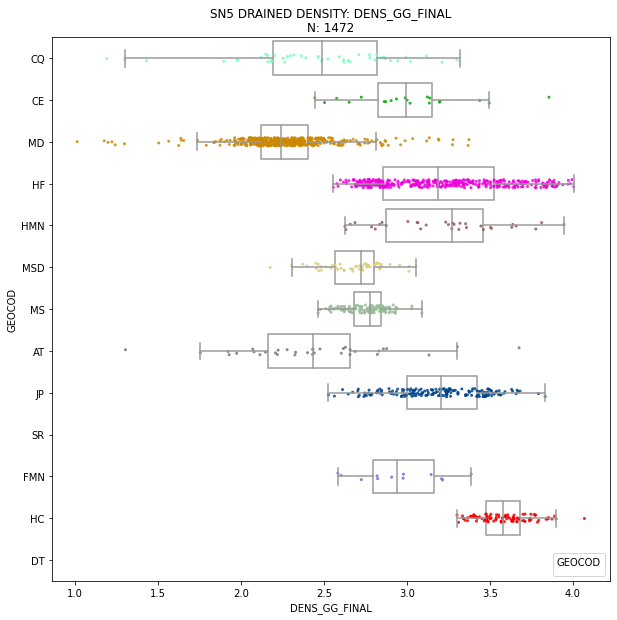

In [63]:
fig, ax = plt.subplots(figsize=chart_size)

df = fso

    # Show the conditional means
    #sea.pointplot(x="value", y="measurement", hue="species",
    #              data=iris, dodge=.532, join=False, palette="dark",
    #              markers="d", scale=.75, ci=None)

sea.boxplot(x=df.DENS_GG_FINAL, y=df.GEOCOD, color='white', fliersize=0)
stp = sea.stripplot(x="DENS_GG_FINAL", y="GEOCOD", data=df, dodge=True, alpha=0.85, zorder=1, palette=litocolor, size=3)

#plt.xlim(-2, 2)
    #sea.pointplot(x="D_FEGL", y="TEOR", hue="CLI",
    #              data=df_gl, dodge=0.5, join=False, palette=litocolor,
    #              scale=.75, ci=None)
    
stp.set_title(proj + ' DRAINED DENSITY: DENS_GG_FINAL\nN: ' + str(df['DENS_GG_FINAL'].count())) 
    
    # Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:], title="GEOCOD",
        handletextpad=0, columnspacing=1,
        loc="lower right", ncol=4, frameon=True)
plt.show()

fig.savefig(proj +'_DENSITY_GG_stripplot.jpeg', transparent=None)

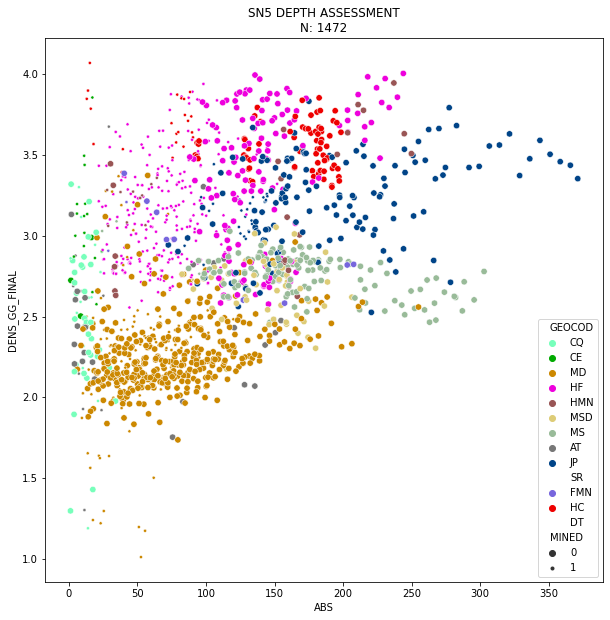

In [88]:
fig, ax = plt.subplots(figsize=chart_size)

df = fso

markers = {1: '.', 0: 'o'}

sca=sea.scatterplot(data=df, x='ABS', y="DENS_GG_FINAL", hue="GEOCOD", style='MINED', markers=markers, palette=litocolor, s=40)

sca.set_title(proj + ' DEPTH ASSESSMENT\nN: ' + str(df['DENS_GG_FINAL'].count()))

fig.savefig(proj + '_DENSITY_DEPTH_ASSESS.jpeg', transparent=None)
plt.show()

## EXIT

In [48]:
df_ind = pd.read_csv(address+'sn5sn5_ind_entry.csv', low_memory=False, na_values='-99', encoding="latin1")
df_ind.rename(columns=str.upper, inplace=True)

In [49]:
df_ind.columns

Index(['COMPID', 'DHID', 'MIDX', 'MIDY', 'MIDZ', 'TOPX', 'TOPY', 'TOPZ',
       'BOTX', 'BOTY', 'BOTZ', 'LENGTH', 'FROM', 'TO', 'GEOCOD', 'BOUND',
       'FEGL', 'V_IND1', 'V_IND2', 'IK'],
      dtype='object')

In [50]:
df_ind.GEOCOD.unique()

array(['CE', 'HC', 'MD', 'HF', 'CQ', 'SR', 'MSD', 'AT', 'MS', 'HMN', 'DT',
       'FMN', 'JP', 'CGL'], dtype=object)

In [51]:
litos = ['CE', 'HC', 'MD', 'HF', 'CQ', 'SR', 'MSD', 'AT', 'MS', 'HMN', 'DT',
       'FMN', 'JP', 'CGL']

In [52]:
ore = ['CE', 'HC', 'HF','HMN']

In [53]:
i=~df_ind.GEOCOD.isin(ore)

In [54]:
df_ind.loc[i,:].GEOCOD.unique()

array(['MD', 'CQ', 'SR', 'MSD', 'AT', 'MS', 'DT', 'FMN', 'JP', 'CGL'],
      dtype=object)